# PRIYANKA PRAKASH KATARIYA | BL.EN.U4AIE21107

# LAB ASSIGNMENT-6 | 14th March 2024

In [1]:
import librosa
import matplotlib.pyplot as plt
import IPython.display as ipd
from pydub import AudioSegment
from pydub.playback import play
import numpy as np

/Users/localadmin/anaconda3/lib/python3.11/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


A1.Take a portion of your recorded signal which represents a vowel sound. Perform FFT on the signal snippet and observe the amplitude spectrum. Repeat the same for a few vowelsounds.

In [2]:
#loading the audio file using librosa
aisp_pri, sr = librosa.load('/Users/localadmin/Desktop/VI/AISP/audios/AIinSPaudiofeb1.wav')

In [3]:
#segmentation to reduce the audio signal to a vowel 'a'
segment_a = aisp_pri[int(0*sr):int(0.5*sr)]
ipd.Audio(segment_a, rate = sr)

In [4]:
#Fast Fourier Transform on the segment vowel(a) audio
spectral_domain_a = np.fft.fft(segment_a)

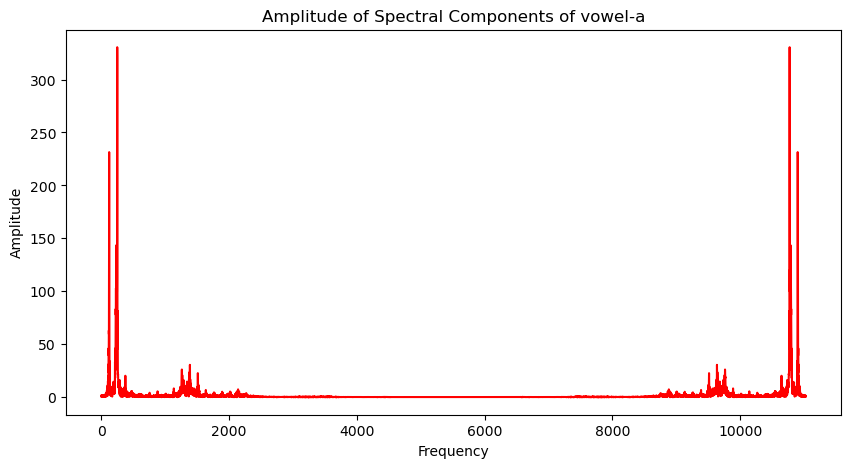

In [5]:
#observed amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_domain_a),color = 'red')
plt.title("Amplitude of Spectral Components of vowel-a")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [6]:
#segmentation to reduce the audio signal to a vowel 'i'
segment_i = aisp_pri[int(0.5*sr):int(0.75*sr)]
ipd.Audio(segment_i, rate = sr)

In [7]:
#Fast Fourier Transform on the segment vowel(i) audio
spectral_domain_i = np.fft.fft(segment_i)

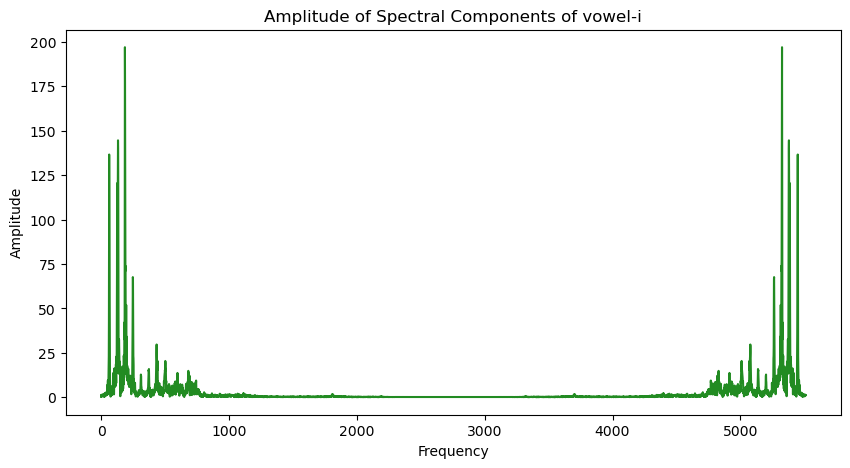

In [8]:
#observed amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_domain_i),color = 'forestgreen')
plt.title("Amplitude of Spectral Components of vowel-i")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

A2. Repeat the A1 for a consonant sound. Perform the same for a few consonant sounds.

In [9]:
#segmentation to reduce the audio signal to a consonant 's'
segment_s = aisp_pri[int(1*sr):int(1.12*sr)]
ipd.Audio(segment_s, rate = sr)

In [10]:
#Fast Fourier Transform on the segment consonant(s) audio
spectral_domain_s = np.fft.fft(segment_s)

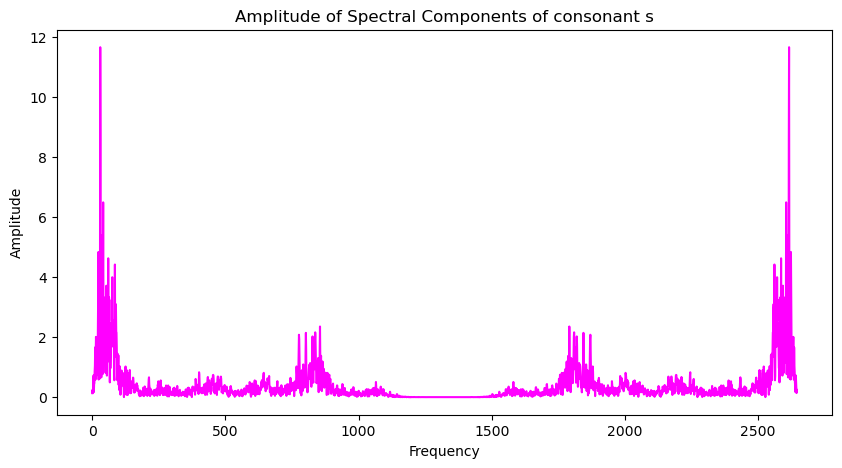

In [11]:
#observed amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_domain_s),color = 'magenta')
plt.title("Amplitude of Spectral Components of consonant s")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

In [12]:
#segmentation to reduce the audio signal to a consonant 'p'
segment_p = aisp_pri[int(1.12*sr):int(1.25*sr)]
ipd.Audio(segment_p, rate = sr)

In [13]:
#Fast Fourier Transform on the segment consonant(p) audio
spectral_domain_p = np.fft.fft(segment_p)

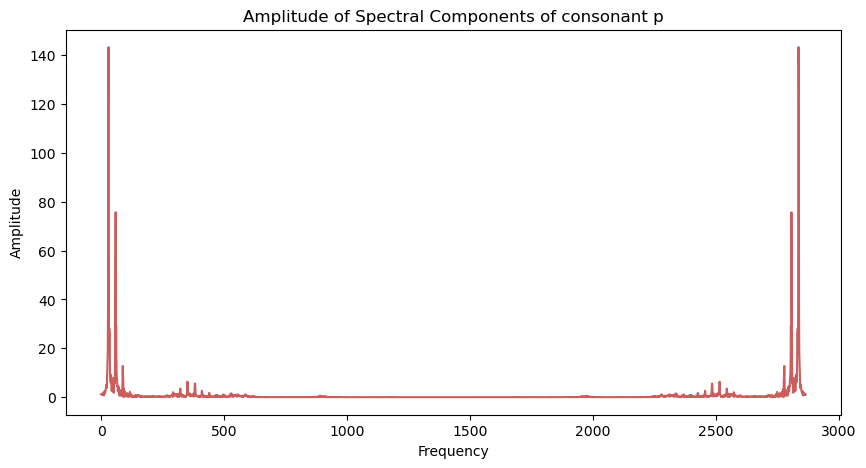

In [14]:
#observed amplitude spectrum
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_domain_p),color = 'indianred')
plt.title("Amplitude of Spectral Components of consonant p")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

A3. Repeat A2 for few slices of silence & non-voiced portions of the recorded speech signal.

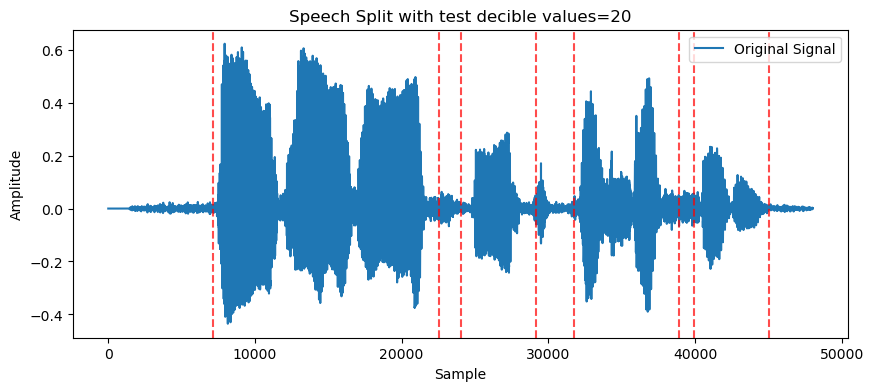

In [18]:
random_test_values = [20]

for top_db in random_test_values:
    intervals = librosa.effects.split(aisp_pri, top_db=top_db)

    plt.figure(figsize=(10, 4))
    plt.plot(aisp_pri, label='Original Signal')

    for interval in intervals:
        plt.axvline(interval[0], color='red', linestyle='--', alpha=0.7,)
        plt.axvline(interval[1], color='red', linestyle='--', alpha=0.7)

    plt.title(f'Speech Split with test decible values={top_db}')
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

    for i, (start, end) in enumerate(intervals):
        segment = aisp_pri[start:end]
        ipd.Audio(segment, rate=sr)

In [20]:
#segmentation of silent part of audio signal
segment_silent = aisp_pri[int(0*sr):int(0.25*sr)]
ipd.Audio(segment_silent, rate = sr)

In [22]:
#Fast Fourier Transform on the silent segment audio
spectral_domain_silent = np.fft.fft(segment_silent)

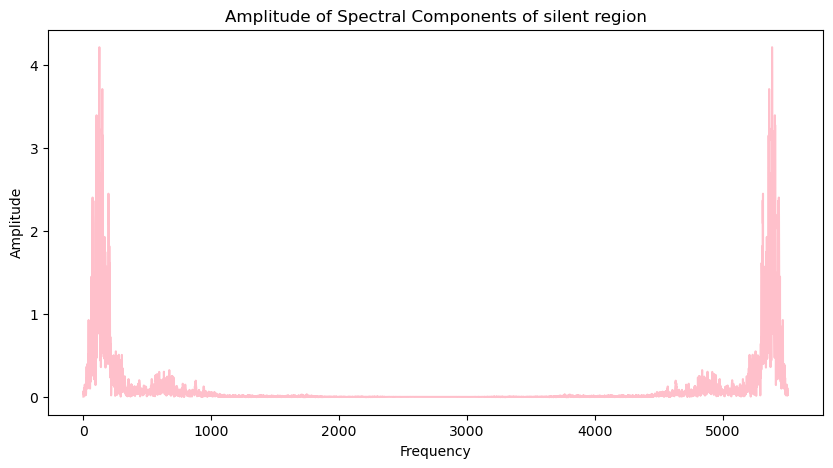

In [23]:
#observed amplitude spectrum of silent region in audio
plt.figure(figsize=(10, 5))
plt.plot(np.abs(spectral_domain_silent),color = 'pink')
plt.title("Amplitude of Spectral Components of silent region")
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.show()

A4. Generate the spectrogram of the signal and observe the change points of the signals with associated speech segments. Observe to identify the consonants and vowels from the spectrogram.

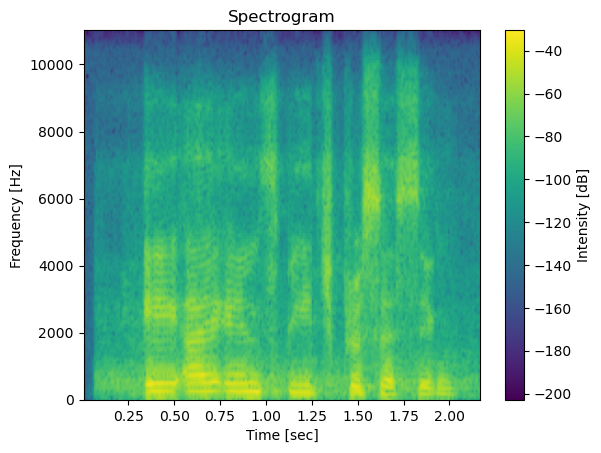

In [25]:
from scipy.signal import spectrogram
frequencies, times, spectrogram_data = spectrogram(aisp_pri, sr)

# Plot spectrogram
plt.pcolormesh(times, frequencies, 10 * np.log10(spectrogram_data), shading='gouraud')  
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram')
plt.colorbar(label='Intensity [dB]')
plt.show()

The darker or more intense regions in the spectrogram represent the consonants and vowels being spoken. highest intensity is seen in vowels.